In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime as dt
import datetime

KeyboardInterrupt: 

In [ ]:
def read_data_path(leaguename,leaguecode):
    
    pathlist=[]
    
    
    for i in range(31,0,-1):
            
        sales = "../"+leaguename+'/'+leaguecode+' ('+str(i)+')'+'.csv'
          
        if(os.path.isfile(sales)):
                pathlist.append(sales)
    
    sales1 = "../"+leaguename+'/'+leaguecode+'.csv'
    if(os.path.isfile(sales1)):
        pathlist.append(sales1)
    return pathlist



In [ ]:
premleague=read_data_path("premierleague","E0")
ligue1=read_data_path("ligue1","F1")
laliga=read_data_path("laliga","SP1")
bundesliga=read_data_path("bundesligua","D1")
serieA=read_data_path("serieA","I1")

In [ ]:
def preprocess(df):
    miss_values=df.isna().mean()*100
   
    keep=miss_values[miss_values<=10].index
    df=df[keep]
    return df


def change(date):
    date=str(date)
    if len(date)<=8:
         date=date[:6]+'20'+date[6:]
    return date
    
def merge_data(list):
    dfs=[]
    for filename in list:
        df= pd.read_csv(filename)
        df.set_index
        df=df.dropna(subset=["HomeTeam"])
        df=df.dropna(subset=["AwayTeam"])
        a=df.isna().sum().value_counts
        df.Date=df.Date.apply(change)
        df.Date=df.Date.apply(lambda x:x.replace("/","-"))
        dfs.append(df)
    
    merged_df = pd.concat(dfs, axis=0)
    merged_df=preprocess(merged_df)
    
    return merged_df

In [ ]:
ligue1

['../ligue1/F1 (17).csv',
 '../ligue1/F1 (16).csv',
 '../ligue1/F1 (15).csv',
 '../ligue1/F1 (14).csv',
 '../ligue1/F1 (13).csv',
 '../ligue1/F1 (12).csv',
 '../ligue1/F1 (11).csv',
 '../ligue1/F1 (10).csv',
 '../ligue1/F1 (9).csv',
 '../ligue1/F1 (8).csv',
 '../ligue1/F1 (7).csv',
 '../ligue1/F1 (6).csv',
 '../ligue1/F1 (5).csv',
 '../ligue1/F1 (4).csv',
 '../ligue1/F1 (3).csv',
 '../ligue1/F1 (2).csv',
 '../ligue1/F1 (1).csv',
 '../ligue1/F1.csv']

In [ ]:
def dataprepocessing(leaguename,teams):
    dfs=[]
    df_class = pd.DataFrame(index=teams)
    df_class.index.name = 'Equipe'
    df_class.reset_index
    def preprocess(df):
        miss_values=df.isna().mean()*100
        keep=miss_values[miss_values<=10].index
        df=df[keep]
        return df
    def change_date_format(date):
        date=str(date)
        if len(date)<=8:
            date=date[:6]+'20'+date[6:]
        return date
    
    def get_classement(row, classement_dict):
        equipe = row.name
        classement = classement_dict.get(equipe, '-')
        return classement

    def classement(data,df_class):   
            dict_u={}
            teams=data.HomeTeam.unique()

            for i in range(len(teams)):
                dict_u[teams[i]]=0


            for i in range(len(data)):
                if data.iloc[i]['FTR']=='H':
                    dict_u[data.iloc[i].HomeTeam]=dict_u[data.iloc[i].HomeTeam]+3
                elif data.iloc[i]['FTR']=='A':
                    dict_u[data.iloc[i].AwayTeam]=dict_u[data.iloc[i].AwayTeam]+3
                else :
                    dict_u[data.iloc[i].HomeTeam]=dict_u[data.iloc[i].HomeTeam]+1
                    dict_u[data.iloc[i].AwayTeam]=dict_u[data.iloc[i].AwayTeam]+1
            dict_u=dict(sorted(dict_u.items(), key=lambda x: x[1], reverse=True))
            noms_equipes = list(dict_u.keys())
            points = list(dict_u.values())

            # Création du dataframe
            df = pd.DataFrame({'Points': points}, index=noms_equipes)
            df.index.name = 'Equipe'
            df.reset_index(inplace=True)
            df.index += 1
            df.index.name = 'Classement'
            df.reset_index(inplace=True)
            d=data.Date[0]
            if(len(d)>8):
                d=d[6:]
            else:
                d="20"+d[6:]

            l={}
            teams=data.HomeTeam.unique()
            for i in range(len(teams)):
                l[teams[i]]=0
            for i in range(len(df)):
                x=int(df.iloc[i].Classement)
                
                l[df.iloc[i].Equipe]=x

            noms_equipes = list(l.keys())
            classement = list(l.values())
            df_class[d]=df_class.apply(get_classement, axis=1, args=(l,))
        
    # Gets the goals scored agg arranged by teams and matchweek
    def get_goals_scored(playing_stat):
        # Créer un dictionnaire avec les noms d'équipe comme clés
        teams = {}
        for i in playing_stat.groupby('HomeTeam').mean().T.columns:
            if i != 'nan': # Vérifier que le nom de l'équipe n'est pas NaN
                teams[i] = []
        
        # La valeur correspondant aux clés est une liste contenant les buts marqués par match.
        for i in range(len(playing_stat)):
            HTGS = playing_stat.iloc[i]['FTHG']
            ATGS = playing_stat.iloc[i]['FTAG']
            teams[playing_stat.iloc[i].HomeTeam].append(HTGS)        
            teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
        
        max_length = max([len(team) for team in teams.values()])
        for team, goals_scored in teams.items():
            if len(goals_scored) < max_length:
                goals_scored += [float('nan')] * (max_length - len(goals_scored))

        # Create the DataFrame
        goals_scored = pd.DataFrame(teams, index=[i for i in range(1, max_length + 1)]).T
        goals_scored[0]=0

        for i in range(2,max_length+1):
         goals_scored[i] = goals_scored[i] + goals_scored[i-1]

        return goals_scored


    def get_goals_conceded(playing_stat):
        # Create a dictionary with team names as keys
        teams = {}
        for i in playing_stat.groupby('HomeTeam').mean().T.columns:
            teams[i] = []

        # Fill the dictionary with the number of goals conceded by each team in each match
        for i in range(len(playing_stat)):
            ATGC = playing_stat.iloc[i]['FTHG']
            HTGC = playing_stat.iloc[i]['FTAG']
            teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
            teams[playing_stat.iloc[i].AwayTeam].append(ATGC)

        # Add NaN values to teams with missing data
        max_length = max([len(team) for team in teams.values()])
        for team, goals_conceded in teams.items():
            if len(goals_conceded) < max_length:
                goals_conceded += [float('nan')] * (max_length - len(goals_conceded))

        # Create the DataFrame
        goals_conceded = pd.DataFrame(teams, index=[i for i in range(1, max_length + 1)]).T
        goals_conceded[0]=0
        for i in range(2,max_length+1):
            goals_conceded[i] = goals_conceded[i] + goals_conceded[i-1]

        

        return goals_conceded



    def get_gss(playing_stat):
        GC = get_goals_conceded(playing_stat)
        GS = get_goals_scored(playing_stat)

        j = 0
        HTGS = []
        ATGS = []
        HTGC = []
        ATGC = []

        for i in range(len(playing_stat)):
            ht = playing_stat.iloc[i].HomeTeam
            at = playing_stat.iloc[i].AwayTeam
            HTGS.append(GS.loc[ht][j])
            ATGS.append(GS.loc[at][j])
            HTGC.append(GC.loc[ht][j])
            ATGC.append(GC.loc[at][j])

            if ((i + 1) % 10) == 0:
                j = j + 1

        playing_stat['HTGS'] = HTGS
        playing_stat['ATGS'] = ATGS
        playing_stat['HTGC'] = HTGC
        playing_stat['ATGC'] = ATGC

        return playing_stat
    
    
    def get_points(result):
        if result == 'W':
            return 3
        elif result == 'D':
            return 1
        else:
            return 0

    def get_cuml_points(matchres):
        matchres_points = matchres.applymap(get_points)
        for i in range(2,len(matchres.columns)+1):
            matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        matchres_points.insert(loc=0, column=0, value=[0*i for i in range(len(matchres))])
        return matchres_points


    def get_matchres(playing_stat):
        # Create a dictionary with team names as keys
        teams = {}
        for i in playing_stat.groupby('HomeTeam').mean().T.columns:
            teams[i] = []

        # the value corresponding to keys is a list containing the match result
        for i in range(len(playing_stat)):
            if playing_stat.iloc[i].FTR == 'H':
                teams[playing_stat.iloc[i].HomeTeam].append('W')
                teams[playing_stat.iloc[i].AwayTeam].append('L')
            elif playing_stat.iloc[i].FTR == 'A':
                teams[playing_stat.iloc[i].AwayTeam].append('W')
                teams[playing_stat.iloc[i].HomeTeam].append('L')
            else:
                teams[playing_stat.iloc[i].AwayTeam].append('D')
                teams[playing_stat.iloc[i].HomeTeam].append('D')
        
        max_length = max([len(team) for team in teams.values()])
        for team in teams:
            teams[team] += [''] * (max_length - len(teams[team]))
        

        return pd.DataFrame(teams, index=[i for i in range(1, max_length+1)]).T


    def get_agg_points(playing_stat):
        matchres = get_matchres(playing_stat)
        cum_pts = get_cuml_points(matchres)
        HTP = []
        ATP = []
        j = 0
        for i in range(len(playing_stat)):
            
            ht = playing_stat.iloc[i].HomeTeam
            at = playing_stat.iloc[i].AwayTeam
            HTP.append(cum_pts[j][ht])
            ATP.append(cum_pts[j][at])
            

            if ((i + 1)% 10) == 0:
                j = j + 1
                
        playing_stat['HTP'] = HTP
        playing_stat['ATP'] = ATP
        return playing_stat
    def get_form(playing_stat,num):
        form = get_matchres(playing_stat)
        form_final = form.copy()
        
        for i in range(num,len(form_final)):
            form_final[i] = ''
            j = 0
            while j < num:
                form_final[i] += form[i-j]
                j += 1           
        return form_final
    
    def get_last(playing_stat, Standings, year):
        HomeTeamLP = []
        AwayTeamLP = []
        for i in range(len(playing_stat)):
            ht = playing_stat.iloc[i].HomeTeam
            at = playing_stat.iloc[i].AwayTeam
            HomeTeamLP.append(int(Standings[Standings.Equipe==ht][year].values))
            AwayTeamLP.append(int(Standings[Standings.Equipe==at][year].values))
        playing_stat['HomeTeamLP'] = HomeTeamLP
        playing_stat['AwayTeamLP'] = AwayTeamLP
        return playing_stat

    def add_form(playing_stat,num):
        form = get_form(playing_stat,num)
        # print('form:',form)
        h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
        a = ['M' for i in range(num * 10)]
        j = num
        for i in range((num*10),len(playing_stat)):
            ht = playing_stat.iloc[i].HomeTeam
            at = playing_stat.iloc[i].AwayTeam
            k=playing_stat.iloc[i].MW
            
            h.append(form.loc[ht][k-num][-1])
            # if len(past) >= 2:
            #     h.append(past[0])
            # else:
            #     h.append(past)
            a.append(form.loc[at][k-num][-1])


          
            # if len(past)>=2:
            #     a.append(past[0])
            # else:
            #     a.append(past)                 
                
            # past = form.loc[ht][j]             
            # if len(past) >= num:
            #  h.append(past[num-1])
            # else:
            #  h.append('M')
            #  past = form.loc[at][j] 
            # if len(past) >= num:
            #  a.append(past[num-1])
            # else:
            #  a.append('M')                   # 0 index is most recent
            
                        # get past n results.
                        # 0 index is most recent
            
            if ((i+1)% 10) == 0:
                j = j + 1
        # print("h:",h)
        # print("a",a)

        playing_stat['HM' + str(num)] = h                 
        playing_stat['AM' + str(num)] = a

        
        return playing_stat


    def add_form_df(playing_statistics):
        playing_statistics = add_form(playing_statistics,1)
        playing_statistics = add_form(playing_statistics,2)
        playing_statistics = add_form(playing_statistics,3)
        playing_statistics = add_form(playing_statistics,4)
        playing_statistics = add_form(playing_statistics,5)
        return playing_statistics 
    def get_mw(playing_stat):
        j = 1
        MatchWeek = []
        for i in range(len(playing_stat)):
            MatchWeek.append(j)
            if ((i + 1)% 10) == 0:
                j = j + 1
        playing_stat['MW'] = MatchWeek
        return playing_stat
    
    def get_form_points(string):
        sum = 0
        for letter in string:
            sum += get_points(letter)
        return sum
    
    def get_3game_ws(string):
        if string[-3:] == 'WWW':
            return 1
        else:
            return 0
    
    def get_5game_ws(string):
        if string == 'WWWWW':
            return 1
        else:
            return 0
        
    def get_3game_ls(string):
        if string[-3:] == 'LLL':
            return 1
        else:
            return 0
        
    def get_5game_ls(string):
        if string == 'LLLLL':
            return 1
        else:
            return 0
    
    def only_hw(string):
        if string == 'H':
            return 'H'
        else:
            return 'NH'

    
    for filename in leaguename:
        data= pd.read_csv(filename)
        data.set_index
        data=data.dropna(subset=["HomeTeam"])
        data=data.dropna(subset=["AwayTeam"])
        data.Date=data.Date.apply(change_date_format)
        d=data.Date[0]
        if(len(d)>8):
            d=d[6:]
        else:
            d="20"+d[6:]
        data.Date=data.Date.apply(lambda x:x.replace("/","-"))
        data=preprocess(data)
        classement(data,df_class)
        classement(data,df_class)
        columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']
        statleague=data[columns_req]
        statleague=get_gss(statleague)
        statleague=get_agg_points(statleague)
        statleague=get_mw(statleague)
        statleague=add_form_df(statleague)
        cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]
        statleague=statleague[cols]
        df_class.to_csv("classement.csv", index = True)
        Standings = pd.read_csv("classement.csv",).replace('-',len(teams))
        statleague=get_last(statleague, Standings,d)
        statleague=get_mw(statleague)
        
        dfs.append(statleague)

    statleague = pd.concat(dfs, axis=0)
    statleague=preprocess(statleague)

    statleague['HTFormPtsStr'] = statleague['HM5'] + statleague['HM4'] + statleague['HM3'] + statleague['HM2'] + statleague['HM1']
    statleague['ATFormPtsStr'] = statleague['AM5'] + statleague['AM4'] + statleague['AM3'] + statleague['AM2'] + statleague['AM1']
   

    statleague['HTFormPts'] = statleague['HTFormPtsStr'].apply(get_form_points)
    statleague['ATFormPts'] = statleague['ATFormPtsStr'].apply(get_form_points)
    
    # print('HTFormPts',statleague['HTFormPts'])
    # print('ATFormPts',statleague['ATFormPts'])


    statleague['HTWinStreak3'] = statleague['HTFormPtsStr'].apply(get_3game_ws)
    statleague['HTWinStreak5'] = statleague['HTFormPtsStr'].apply(get_5game_ws)
    statleague['HTLossStreak3'] = statleague['HTFormPtsStr'].apply(get_3game_ls)
    statleague['HTLossStreak5'] = statleague['HTFormPtsStr'].apply(get_5game_ls)

    statleague['ATWinStreak3'] = statleague['ATFormPtsStr'].apply(get_3game_ws)
    statleague['ATWinStreak5'] = statleague['ATFormPtsStr'].apply(get_5game_ws)
    statleague['ATLossStreak3'] = statleague['ATFormPtsStr'].apply(get_3game_ls)
    statleague['ATLossStreak5'] = statleague['ATFormPtsStr'].apply(get_5game_ls)

    # Get Goal Difference
    statleague['HTGD'] = statleague['HTGS'] - statleague['HTGC']
    statleague['ATGD'] = statleague['ATGS'] - statleague['ATGC']

    # Diff in points
    statleague['DiffPts'] = statleague['HTP'] - statleague['ATP']
    statleague['DiffFormPts'] = statleague['HTFormPts'] - statleague['ATFormPts']

    # Diff in last year positions
    statleague['DiffLP'] = statleague['HomeTeamLP'] - statleague['AwayTeamLP']
    print("1:",statleague.shape)
    print(statleague)

    cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
    statleague.MW = statleague.MW.astype(float)
    for col in cols:
        statleague[col] = statleague[col] / statleague.MW
        
    statleague['FTR'] = statleague.FTR.apply(only_hw)
    print("3:",statleague.shape)

    # Testing set (2015-16 season)
    playing_stat_test = statleague[6000:]

    statleague.to_csv("final_dataset.csv")
    playing_stat_test.to_csv("test.csv")

    df_class.to_csv("classement.csv", index = True)

    
    return statleague,df_class

In [ ]:
rer=merge_data(ligue1)
teams=rer.HomeTeam.unique()

In [ ]:
f=pd.read_csv("../ligue1/F1.csv")
f.set_index=True
f.head(20)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,F1,05/08/2022,20:00,Lyon,Ajaccio,2,1,H,2,1,...,2.27,-1.50,2.08,1.85,2.12,1.81,2.12,1.96,2.01,1.86
1,F1,06/08/2022,16:00,Strasbourg,Monaco,1,2,A,0,1,...,1.74,-0.25,2.03,1.90,2.07,1.87,2.13,1.90,2.06,1.82
2,F1,06/08/2022,20:00,Clermont,Paris SG,0,5,A,0,3,...,2.87,2.00,1.94,1.99,1.93,1.98,1.95,2.17,1.83,2.02
3,F1,07/08/2022,12:00,Toulouse,Nice,1,1,D,1,0,...,1.85,0.00,1.81,2.13,1.81,2.14,1.83,2.15,1.80,2.09
4,F1,07/08/2022,14:00,Angers,Nantes,0,0,D,0,0,...,1.70,0.25,1.85,2.08,1.83,2.09,1.87,2.12,1.81,2.07
5,F1,07/08/2022,14:00,Lens,Brest,3,2,H,1,0,...,1.99,-1.00,2.07,1.86,2.10,1.83,2.13,1.87,2.07,1.81
6,F1,07/08/2022,14:00,Lille,Auxerre,4,1,H,3,0,...,1.93,-0.75,1.77,2.02,1.80,2.13,1.87,2.13,1.82,2.05
7,F1,07/08/2022,14:00,Montpellier,Troyes,3,2,H,2,2,...,1.65,-0.25,1.90,2.03,1.91,2.02,1.92,2.07,1.84,2.03
8,F1,07/08/2022,16:05,Rennes,Lorient,0,1,A,0,0,...,2.07,-1.25,2.08,1.73,2.15,1.79,2.15,1.87,2.07,1.80
9,F1,07/08/2022,19:45,Marseille,Reims,4,1,H,2,0,...,1.86,-1.00,2.10,1.70,2.15,1.79,2.18,1.90,2.07,1.80


In [ ]:
def evolution(f):
    def get_points(result):
            if result == 'W':
                return 3
            elif result == 'D':
                return 1
            else:
                return 0

    def get_matchres(playing_stat):
            # Create a dictionary with team names as keys
            teams = {}
            for i in playing_stat.groupby('HomeTeam').mean().T.columns:
                teams[i] = []

            # the value corresponding to keys is a list containing the match result
            for i in range(len(playing_stat)):
                if playing_stat.iloc[i].FTR == 'H':
                    teams[playing_stat.iloc[i].HomeTeam].append('W')
                    teams[playing_stat.iloc[i].AwayTeam].append('L')
                elif playing_stat.iloc[i].FTR == 'A':
                    teams[playing_stat.iloc[i].AwayTeam].append('W')
                    teams[playing_stat.iloc[i].HomeTeam].append('L')
                else:
                    teams[playing_stat.iloc[i].AwayTeam].append('D')
                    teams[playing_stat.iloc[i].HomeTeam].append('D')
            
            max_length = max([len(team) for team in teams.values()])
            for team in teams:
                teams[team] += [''] * (max_length - len(teams[team]))
            

            return pd.DataFrame(teams, index=[i for i in range(1, max_length+1)]).T

    def get_cuml_points(matchres):
            matchres_points = matchres.applymap(get_points)
            for i in range(2,len(matchres.columns)+1):
                matchres_points[i] = matchres_points[i] + matchres_points[i-1]
            matchres_points.insert(loc=0, column=0, value=[0*i for i in range(len(matchres))])
            return matchres_points
    d=get_matchres(f)
    c=get_cuml_points(d)
    




In [ ]:
d=get_matchres(f)

In [ ]:
c=get_cuml_points(d)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
Ajaccio,0,0,1,1,1,1,1,1,4,4,...,18,21,21,21,21,21,21,21,22,22
Angers,0,1,2,2,2,2,2,5,8,8,...,10,10,10,10,10,11,14,14,14,14
Auxerre,0,0,1,4,7,7,7,7,7,8,...,18,21,22,23,23,26,29,32,33,33
Brest,0,0,1,4,4,4,5,5,5,6,...,20,20,23,23,24,27,28,31,32,35
Clermont,0,0,3,6,6,6,9,10,10,13,...,30,31,34,34,34,37,40,43,46,49
Lens,0,3,4,7,10,13,14,17,18,21,...,49,50,51,54,57,60,63,63,66,69
Lille,0,3,4,4,7,7,10,10,13,13,...,41,44,45,46,49,52,52,55,56,59
Lorient,0,3,4,7,7,10,13,16,19,22,...,39,39,40,43,44,44,45,45,45,48
Lyon,0,3,6,7,10,13,13,13,13,13,...,35,38,39,40,41,44,47,50,50,53
Marseille,0,3,4,7,10,13,16,19,20,23,...,52,52,55,56,59,60,61,64,67,70


In [ ]:
import pandas as pd

# Charger les données depuis un fichier CSV
df=merge_data(premleague)

# Calculer la moyenne des colonnes pour chaque équipe
df_home = df.groupby("HomeTeam")["FTHG", "HS", "HST", "HC", "HY"].mean()
df_away = df.groupby("AwayTeam")["FTAG", "AS", "AST", "AC", "AY"].mean()

# Fusionner les deux dataframes pour obtenir une seule dataframe contenant les moyennes pour chaque équipe
df_combined = pd.concat([df_home, df_away], axis=1)

# Calculer une note générale pour chaque équipe en prenant la moyenne des moyennes de chaque colonne
df_combined["NoteGenerale"] = df_combined.mean(axis=1) * 10+27
gen=df_combined["NoteGenerale"]
# Trier les équipes par note générale
df_combined = df_combined.sort_values(by="NoteGenerale", ascending=False)

# Afficher la dataframe avec les notes générales pour chaque équipe
print(gen)


Arsenal             87.884195
Aston Villa         75.664362
Birmingham          70.302632
Blackburn           76.481203
Blackpool           78.000000
Bolton              78.443609
Bournemouth         72.451393
Brentford           71.137255
Brighton            75.854839
Burnley             68.818713
Cardiff             69.947368
Charlton            68.447368
Chelsea             90.017193
Crystal Palace      72.559415
Derby               66.736842
Everton             78.274720
Fulham              74.308333
Huddersfield        66.000000
Hull                70.394737
Leeds               78.949482
Leicester           75.969590
Liverpool           92.318757
Man City            91.586310
Man United          88.268817
Middlesbrough       71.307018
Newcastle           76.040356
Norwich             71.754386
Nott'm Forest       66.159274
Portsmouth          79.726316
QPR                 79.666667
Reading             72.649123
Sheffield United    68.280702
Southampton         77.905221
Stoke     

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
import matplotlib.pyplot as plt

h=list(c.loc['Nice'].values)
u=list(c.loc['Troyes'].values)

34

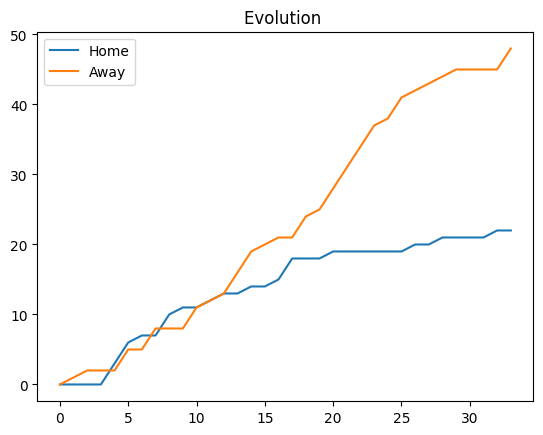

In [ ]:
plt.plot(range(len(u)),u,label="Home")
plt.plot(range(len(h)),h,label="Away")
plt.title("Evolution ")
plt.legend()

In [ ]:
premleague_data,premleague_class=dataprepocessing(ligue1,teams)

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

1: (6689, 42)
           Date   HomeTeam  AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  ATGC  \
0    29-07-2005   Paris SG      Metz   4.0   1.0   H   0.0   0.0   0.0   0.0   
1    30-07-2005      Lille    Rennes   1.0   0.0   H   0.0   0.0   0.0   0.0   
2    30-07-2005  Marseille  Bordeaux   0.0   2.0   A   0.0   0.0   0.0   0.0   
3    30-07-2005      Nancy    Monaco   0.0   1.0   A   0.0   0.0   0.0   0.0   
4    30-07-2005     Nantes      Lens   2.0   0.0   H   0.0   0.0   0.0   0.0   
..          ...        ...       ...   ...   ...  ..   ...   ...   ...   ...   
325  30-04-2023     Troyes      Nice   0.0   1.0   A  41.0  39.0  69.0  31.0   
326  30-04-2023   Paris SG   Lorient   1.0   3.0   A  75.0  43.0  31.0  44.0   
327  30-04-2023  Marseille   Auxerre   2.0   1.0   H  59.0  30.0  31.0  53.0   
328  02-05-2023   Toulouse      Lens   0.0   1.0   A  48.0  54.0  54.0  25.0   
329  03-05-2023      Brest    Nantes   2.0   0.0   H  35.0  35.0  48.0  46.0   

     ...  HTLossStreak5  

AttributeError: 'NoneType' object has no attribute 'replace'

In [ ]:
a=pd.read_csv("classement.csv").replace("-",len(teams))

In [ ]:

a.replace("-",len(teams))   
l=[]
for i in range(len(teams)):
    temp=a.iloc[i,7:19].values

    r=0
    for j in range(len(temp)): 
        r=r+int(temp[j])
    r=int(r/len(temp))
        
    l.append(r)
p=[]

for i in range(len(teams)):
    k=1
    for j in range(len(teams)):
        if l[i]>l[j]:
            k=k+1
    p.append(k)

a["class"]=p

    




In [ ]:
class_glob(a)

In [ ]:
a.head()

,Equipe,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,class
0,Paris SG,9,15,16,5,13,4,2,1,1,1,1,2,1,1,1,2,1,1,1
1,Lille,3,10,7,4,4,1,3,6,3,7,5,12,15,2,4,1,9,5,4
2,Marseille,4,2,3,2,1,2,10,2,6,4,13,5,4,5,2,5,2,2,3
3,Nancy,12,12,4,14,12,12,11,18,40,40,40,19,40,40,40,40,40,40,30
4,Nantes,14,19,40,19,40,40,40,40,8,14,14,7,9,12,12,18,10,17,11


[1,
 4,
 3,
 30,
 11,
 5,
 30,
 9,
 16,
 35,
 26,
 10,
 23,
 20,
 8,
 12,
 24,
 2,
 5,
 33,
 35,
 14,
 27,
 18,
 35,
 35,
 7,
 35,
 35,
 18,
 20,
 24,
 13,
 20,
 16,
 15,
 34,
 27,
 27,
 32]

In [ ]:
a['class']=p

In [ ]:
a.head()

,Equipe,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,class
0,Paris SG,9,15,16,5,13,4,2,1,1,1,1,2,1,1,1,2,1,1,1
1,Lille,3,10,7,4,4,1,3,6,3,7,5,12,15,2,4,1,9,5,4
2,Marseille,4,2,3,2,1,2,10,2,6,4,13,5,4,5,2,5,2,2,3
3,Nancy,12,12,4,14,12,12,11,18,40,40,40,19,40,40,40,40,40,40,30
4,Nantes,14,19,40,19,40,40,40,40,8,14,14,7,9,12,12,18,10,17,11


In [70]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la page web contenant les données sur les matchs de la Liga
url = 'https://www.laliga.com/es-FR/laliga-smartbank/resultados'

# Récupération du contenu HTML de la page web
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Récupération de la table contenant les informations sur les matchs
table = soup.find_all('table', {'class': 'styled__TableStyled-sc-43wy8s-1 iOBNZZ'})[0]
# Récupération des en-têtes de colonnes
headers = []
for th in table.find_all('th'):
    if th.text.strip()!="":
        headers.append(th.text.strip())

# Initialisation d'un DataFrame pour stocker les données des matchs
df = pd.DataFrame(columns=headers)
print(df)

# Récupération des données pour chaque match
for tr in table.find_all('tr')[1:]:
    match_data = []
    for td in tr.find_all('td'):
        
        if td.text.strip()!="":
            match_data.append(td.text.strip())
    print(match_data)
    
    df.loc[len(df)] = match_data

# Suppression des colonnes inutiles
df = df.drop(columns=['Hora', 'TV', 'Jornada'])

# Ajout de deux colonnes pour les joueurs des équipes à domicile et à l'extérieur
df['Joueurs Domicile'] = ''
df['Joueurs Extérieur'] = ''

# Parcours des lignes de la table pour récupérer les informations sur les joueurs
for index, row in df.iterrows():
    # Récupération de l'URL de la page web pour le match
    match_url = row['Partido']
    # Récupération du contenu HTML de la page web pour le match
    match_response = requests.get(match_url)
    match_soup = BeautifulSoup(match_response.text, 'html.parser')
    # Récupération des noms des joueurs des équipes domicile et extérieure
    joueurs_domicile = match_soup.find_all('div', {'class': 'equipo-local'})[0].find_all('span', {'class': 'nombre-jugador'})
    joueurs_exterieur = match_soup.find_all('div', {'class': 'equipo-visitante'})[0].find_all('span', {'class': 'nombre-jugador'})
    # Ajout des noms des joueurs dans les colonnes correspondantes
    df.at[index, 'Joueurs Domicile'] = ', '.join([j.text.strip() for j in joueurs_domicile])
    df.at[index, 'Joueurs Extérieur'] = ', '.join([j.text.strip() for j in joueurs_exterieur])

# Enregistrement du DataFrame dans un fichier CSV
df.to_csv('matchs_liga.csv', index=False)


Empty DataFrame
Columns: [FECHA, HORARIO, PARTIDO, ÁRBITRO, OPERADOR]
Index: []
['VIE 05.05.2023', '19:00', 'Deportivo Alavés1 - 1Granada CF', 'Iván Caparrós Hernández']
['VER PARTIDO']


ValueError: cannot set a row with mismatched columns

In [ ]:
df.head(29)

,,FECHA,HORARIO,,PARTIDO,ÁRBITRO,OPERADOR,
0,,,,,,,,
1,VIE 05.05.2023,VIE 05.05.2023,VIE 05.05.2023,VIE 05.05.2023,VIE 05.05.2023,VIE 05.05.2023,VIE 05.05.2023,VIE 05.05.2023
2,19:00,19:00,19:00,19:00,19:00,19:00,19:00,19:00
3,,,,,,,,
4,Deportivo Alavés1 - 1Granada CF,Deportivo Alavés1 - 1Granada CF,Deportivo Alavés1 - 1Granada CF,Deportivo Alavés1 - 1Granada CF,Deportivo Alavés1 - 1Granada CF,Deportivo Alavés1 - 1Granada CF,Deportivo Alavés1 - 1Granada CF,Deportivo Alavés1 - 1Granada CF
5,Iván Caparrós Hernández,Iván Caparrós Hernández,Iván Caparrós Hernández,Iván Caparrós Hernández,Iván Caparrós Hernández,Iván Caparrós Hernández,Iván Caparrós Hernández,Iván Caparrós Hernández
6,beIN Sports,beIN Sports,beIN Sports,beIN Sports,beIN Sports,beIN Sports,beIN Sports,beIN Sports
7,,,,,,,,
8,VER PARTIDO,VER PARTIDO,VER PARTIDO,VER PARTIDO,VER PARTIDO,VER PARTIDO,VER PARTIDO,VER PARTIDO
9,,,,,,,,


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL du site web contenant les données sur les matchs de Ligue 1
url = 'https://www.lfp.fr/ligue1/calendrier_resultat#sai=104&jour=1'

# Récupération du contenu HTML de la page web
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Récupération de la table contenant les informations sur les matchs
table = soup.find_all('table')[0]

# Récupération des en-têtes de colonnes
headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

# Initialisation d'un DataFrame pour stocker les données des matchs
df = pd.DataFrame(columns=headers)

# Récupération des données pour chaque match
for tr in table.find_all('tr')[1:]:
    match_data = []
    for td in tr.find_all('td'):
        match_data.append(td.text.strip())
    df = df.append(pd.Series(match_data, index=headers), ignore_index=True)

# Suppression des colonnes inutiles
df = df.drop(columns=['#', 'Score', 'Stats', 'Buteurs'])

# Ajout de deux colonnes pour les joueurs des équipes à domicile et à l'extérieur
df['Joueurs Domicile'] = ''
df['Joueurs Extérieur'] = ''

# Parcours des lignes de la table pour récupérer les informations sur les joueurs
for index, row in df.iterrows():
    # Récupération de l'URL de la page web pour le match
    match_url = row['Affluence'].split('(')[0].strip()
    # Récupération du contenu HTML de la page web pour le match
    match_response = requests.get(match_url)
    match_soup = BeautifulSoup(match_response.text, 'html.parser')
    # Récupération des noms des joueurs des équipes domicile et extérieure
    joueurs_domicile = match_soup.find_all('div', {'class': 'eq1 alignLeft'})[0].find_all('a')
    joueurs_exterieur = match_soup.find_all('div', {'class': 'eq2 alignRight'})[0].find_all('a')
    # Ajout des noms des joueurs dans les colonnes correspondantes
    df.at[index, 'Joueurs Domicile'] = ', '.join([j.text.strip() for j in joueurs_domicile])
    df.at[index, 'Joueurs Extérieur'] = ', '.join([j.text.strip() for j in joueurs_exterieur])

# Enregistrement du DataFrame dans un fichier CSV
df.to_csv('matchs_ligue1.csv', index=False)


IndexError: list index out of range